In [70]:
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [ ]:
pip install pycaret

In [103]:
df = pd.read_csv("Documents/findata.csv")
df.head()

,Year,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,Fraud,Current Assets,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990.0,1009.0,3460.0,0.0,0.0,0.0,NaN,NaN,0.0,10.047,...,0.312448,0.095082,0.082631,-0.019761,1.0,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990.0,1011.0,4841.0,0.0,0.0,0.0,NaN,NaN,0.0,1.247,...,0.315904,0.188832,-0.211389,-0.117832,1.0,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990.0,1017.0,3812.0,0.0,0.0,0.0,NaN,NaN,0.0,55.040,...,0.605342,0.097551,-0.105780,0.091206,1.0,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990.0,1021.0,3861.0,0.0,0.0,0.0,NaN,NaN,0.0,24.684,...,0.793068,-0.005725,-0.249704,0.017545,1.0,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990.0,1028.0,7385.0,0.0,0.0,0.0,NaN,NaN,0.0,17.325,...,0.869182,-0.231536,-1.674893,-0.466667,0.0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [104]:
df.drop(labels=['sich', 'insbnk', 'understatement', 'option','p_aaer','new_p_aaer'], axis=1, inplace=True)
df.head()

,Year,gvkey,Fraud,Current Assets,Accounts Payable,Total Assets,Common Equity,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990.0,1009.0,0.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,...,0.312448,0.095082,0.082631,-0.019761,1.0,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990.0,1011.0,0.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,...,0.315904,0.188832,-0.211389,-0.117832,1.0,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990.0,1017.0,0.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,...,0.605342,0.097551,-0.105780,0.091206,1.0,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990.0,1021.0,0.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,...,0.793068,-0.005725,-0.249704,0.017545,1.0,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990.0,1028.0,0.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,...,0.869182,-0.231536,-1.674893,-0.466667,0.0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


In [133]:
dffin = df[df['Year'] < 2008]
dffin

,Year,gvkey,Fraud,Current Assets,Accounts Payable,Total Assets,Common Equity,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990.0,1009.0,0.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,...,0.312448,0.095082,0.082631,-0.019761,1.0,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990.0,1011.0,0.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,...,0.315904,0.188832,-0.211389,-0.117832,1.0,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990.0,1017.0,0.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,...,0.605342,0.097551,-0.105780,0.091206,1.0,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990.0,1021.0,0.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,...,0.793068,-0.005725,-0.249704,0.017545,1.0,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990.0,1028.0,0.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,...,0.869182,-0.231536,-1.674893,-0.466667,0.0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107364,2007.0,278400.0,0.0,15.068,19.877,213.464,158.436,0.383,27.765,33.965,...,0.113218,-6.484197,-1.016552,0.003415,1.0,0.587492,0.360451,-0.033467,-0.015783,-0.439210
107365,2007.0,282189.0,0.0,132.058,81.589,1648.442,397.126,19.784,72.580,84.203,...,0.081214,NaN,NaN,NaN,1.0,0.739231,0.475391,0.020526,0.058919,-0.060172
107366,2007.0,285493.0,0.0,27.718,1.168,70.803,67.131,26.374,12.648,45.117,...,0.104558,NaN,NaN,NaN,1.0,0.504384,0.377384,-0.489428,-0.562999,-1.257920
107367,2007.0,285660.0,0.0,84.184,14.728,115.334,67.193,34.628,70.437,59.743,...,0.495543,1.159222,0.204398,0.043483,1.0,0.346062,0.785232,0.259290,0.148178,-0.146442


In [138]:
data = dffin.iloc[:, list((x for x in range(0,31)))]
data = data.dropna()
data.head()

,Year,gvkey,Fraud,Current Assets,Accounts Payable,Total Assets,Common Equity,Cash and Short-Term Investments,Cost of Goods Sold,Common Shares Outstanding,...,"Property, Plant, and Equipment",Preferred Stock,Retained Earnings,Receivables,Net Sales,Sale of Common and Preferred Stock,Income Taxes Payable,Total Income Taxes,Interest and Related Expense,"Price Close, Annual, Fiscal"
0,1990.0,1009.0,0.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,...,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000
1,1990.0,1011.0,0.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,...,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188
2,1990.0,1017.0,0.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,...,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125
3,1990.0,1021.0,0.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,...,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562
4,1990.0,1028.0,0.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,...,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125


In [139]:
from pycaret.classification import *
s = setup(data, target = 'Fraud', normalize = True, data_split_stratify = True, fold_strategy = 'stratifiedkfold', fold_groups = 'gvkey')

,Description,Value
0,session_id,3989
1,Target,Fraud
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(107369, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [140]:
mlp = create_model('mlp')#, probability_threshold=0.7)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9925,0.7666,0.0517,0.7500,0.0968,0.0959,0.1957
1,0.9923,0.7451,0.0517,0.5000,0.0938,0.0924,0.1590
2,0.9922,0.7730,0.0862,0.4545,0.1449,0.1428,0.1955
3,0.9922,0.7331,0.1034,0.4615,0.1690,0.1667,0.2159
4,0.9919,0.6884,0.0345,0.2857,0.0615,0.0600,0.0970
5,0.9919,0.7679,0.0690,0.3636,0.1159,0.1138,0.1557
6,0.9922,0.7106,0.0345,0.4000,0.0635,0.0623,0.1157
7,0.9916,0.8098,0.0172,0.1429,0.0308,0.0292,0.0472
8,0.9916,0.7728,0.0702,0.2857,0.1127,0.1100,0.1385


In [141]:
tuned = tune_model(mlp, optimize = 'Prec.')
print(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9914,0.7222,0.0690,0.2667,0.1096,0.1068,0.1323
1,0.9918,0.6334,0.1379,0.4000,0.2051,0.2020,0.2316
2,0.9911,0.6663,0.0172,0.0909,0.0290,0.0266,0.0364
3,0.9918,0.7305,0.1034,0.3750,0.1622,0.1594,0.1939
4,0.9914,0.6766,0.0862,0.2941,0.1333,0.1303,0.1558
5,0.9916,0.7195,0.1034,0.3529,0.1600,0.1571,0.1878
6,0.9918,0.6630,0.0517,0.3000,0.0882,0.0862,0.1219
7,0.9920,0.6829,0.1207,0.4375,0.1892,0.1865,0.2269
8,0.9912,0.7198,0.1053,0.2857,0.1538,0.1504,0.1697


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 100, 50], learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3989, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


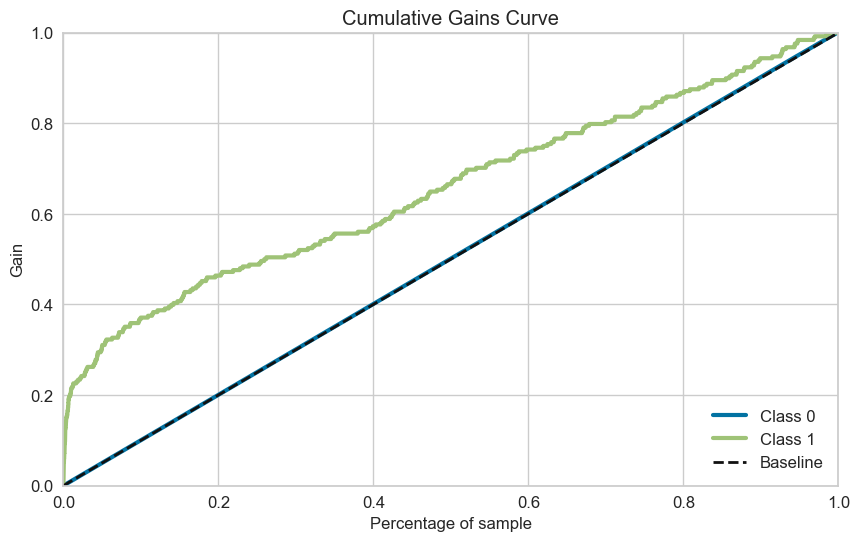

In [142]:
plot_model(tuned, plot = 'gain')

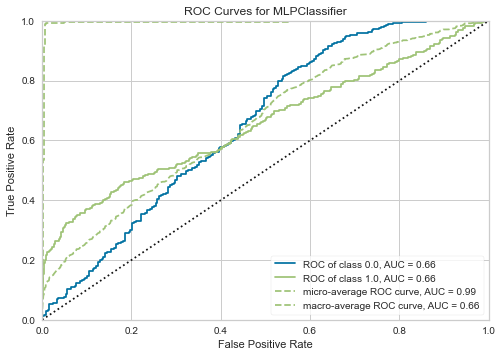

In [144]:
plot_model(tuned, plot = 'auc')